# **Best Neighborhood in Pittsburgh**
#### Group #15 Members: Jake Biondolillo (jwb141@pitt.edu), Laura Liang (lrl45@pitt.edu), Insiah Kizilbash (ink27@pitt.edu)
#### Group Name: JIL

In order to find the best neighborhood in Pittsburgh we considered various factors and then decided to focus on analyzing the environment (based on trees), education, and safety. We analyzed different data sets and found the top neighborhoods in each respective category. Then we compared the findings and found the overall best neighborhood based on those three factors.

## **Environment Through the Lens of Trees**
For my part of the project, I wanted to analyze the environmental aspects of each neighborhood. After sifting through the various datasets located in the Western Pennsylvania Regional Data Center, I came to the conclusion that I want each neighborhood's number of trees as my metric. In my opinion, trees make a neighborhood more lively and beautiful as the neighborhood's become enveloped by nature. I also like the idea of trees as a metric, because it is fun to anaylyze such a massive amount of data. Within the dataset, I was able further explore features of the trees like their condition, which helped make the actually analysis of the data more concise. 

In [14]:
# load pandas
import pandas as pd

# load data
tree = pd.read_csv("pitt_trees.csv", usecols=["_id", "condition", "neighborhood"])

tree.sample(10)

,_id,condition,neighborhood
26311,26312,Fair,North Shore
24389,24390,Fair,Summer Hill
42792,42793,NaN,Crafton Heights
9606,9607,Fair,Shadyside
39682,39683,Fair,South Side Flats
33450,33451,Good,Squirrel Hill South
4270,4271,NaN,Manchester
22389,22390,Poor,Central Business District
45245,45246,Good,West End
32613,32614,Good,Allegheny Center


I only required the id, condition, and neighborhood from my dataset.

In [15]:
# Remove trees that are of Poor condition or worse. Also removes N/A condition
query_mask = tree["condition"].str.contains("N/A|Dead|Critical|Poor|NaN", case = False, na = False)
good_tree = tree[~query_mask]

# Removes any trees with no condition stated
better_tree = good_tree.dropna(subset = "condition")

better_tree.sample(10)

,_id,condition,neighborhood
15705,15706,Good,Squirrel Hill South
21475,21476,Good,South Side Flats
6053,6054,Fair,Point Breeze
27034,27035,Fair,Shadyside
27459,27460,Fair,Brighton Heights
9224,9225,Fair,Brighton Heights
10132,10133,Fair,Brighton Heights
25727,25728,Good,Troy Hill
20658,20659,Fair,Squirrel Hill South
4263,4264,Good,Polish Hill


Here I used a **query mask** to remove data as well as the **dropna** function to remove empty values. 

In [16]:
import matplotlib.pyplot as plt

# Group trees by neighborhood and count number of trees
group_neighborhood = better_tree['neighborhood'].value_counts().reset_index()

# Rename column
group_neighborhood = group_neighborhood.rename(columns = {'index' : 'neighborhood', 'neighborhood' : 'tree_count'})

group_neighborhood.head()

,neighborhood,tree_count
0,Squirrel Hill South,3974
1,Highland Park,2222
2,Squirrel Hill North,1689
3,South Side Flats,1327
4,Shadyside,1055


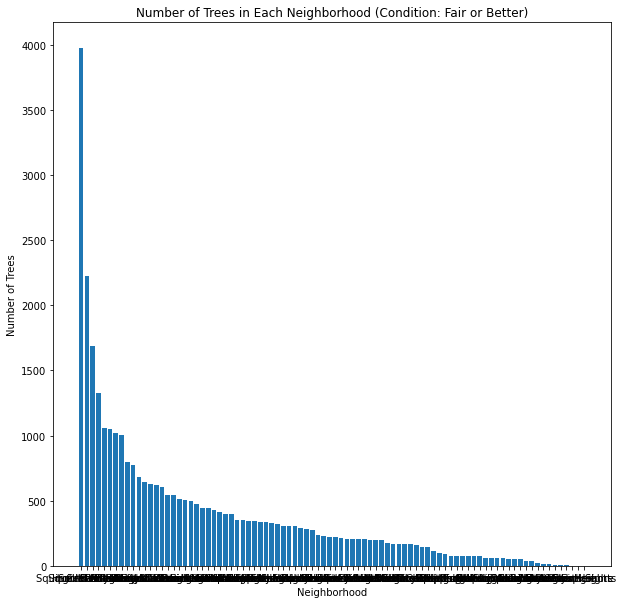

In [17]:
# Create an initial bar graph
plt.figure(figsize = (10,10))
plt.bar(group_neighborhood['neighborhood'], group_neighborhood['tree_count'])

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Trees')
plt.title('Number of Trees in Each Neighborhood (Condition: Fair or Better)')

plt.show()

The initial graph contains too many neighborhoods, making it hard to read and overcomplicated. 

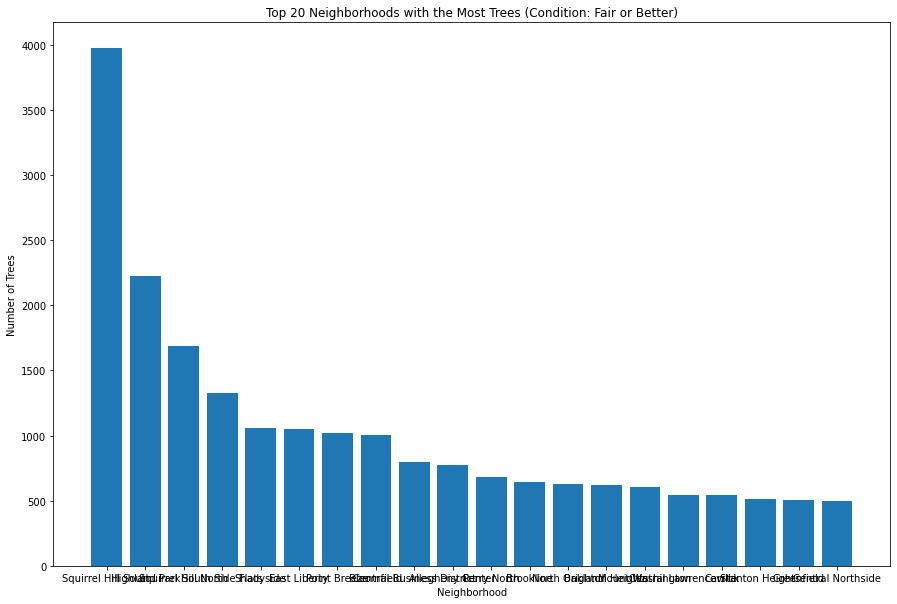

In [18]:
# Only displays top 20 neighborhoods
top_neighborhood = group_neighborhood.head(20)

# Create bar graph
plt.figure(figsize = (15,10))
plt.bar(top_neighborhood['neighborhood'], top_neighborhood['tree_count'])

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Trees')
plt.title('Top 20 Neighborhoods with the Most Trees (Condition: Fair or Better)')

plt.show()

This graph proved to be a much needed improvement, but there was still some overlap with bar labels and overall aesthetic. 

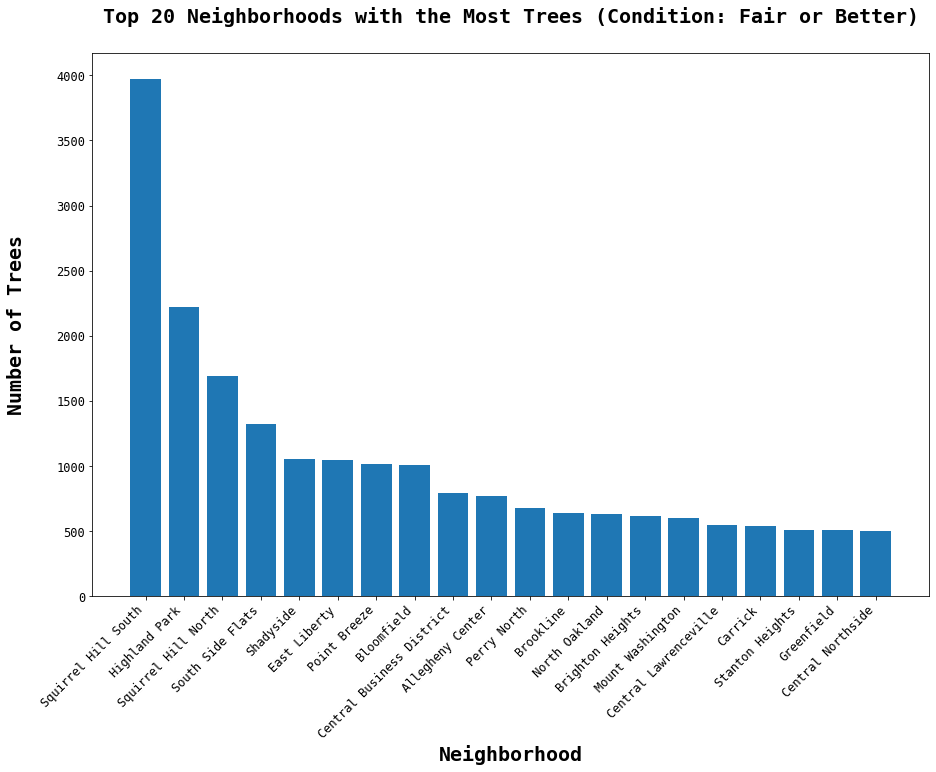

In [19]:
# Create bar graph
plt.figure(figsize = (15,10))
plt.bar(top_neighborhood['neighborhood'], top_neighborhood['tree_count'])

# Add labels and a title; Improved readability
plt.xlabel('Neighborhood', fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.ylabel('Number of Trees', fontsize = 20, labelpad = 30, fontname = 'monospace', weight = 'bold')
plt.title('Top 20 Neighborhoods with the Most Trees (Condition: Fair or Better)', fontname = 'monospace', fontsize = 20, pad = 30, weight = 'bold')

# Improve readability of tick labels
plt.xticks(rotation = 45, ha = 'right', fontname = 'monospace', size = 12, weight = 'normal')
plt.yticks(fontname = 'monospace', size = 12, weight = 'normal')

plt.show()

## **The Best Neighborhood in Pittsburgh based on Education**
To find the best neighborhood in Pittsburgh I focused on education. I utilized a dataset from Western Pennsylvania Regional Data Center that specified how many students from each neighborhood enrolled in each school. For the most part students will simply enroll in the schools closest to them, however, if a school is really good then it will draw students from other neighborhoods all over. 

In [20]:
# importing pandas for use
import pandas as pd
# accessing data
enrollment = pd.read_csv("enrollment.csv")
enrollment.head()

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50


In [21]:
# filtering out schools listed as "Other" 
enrollment_filtered = enrollment[enrollment['school'] != "Other"]
enrollment_filtered.head()

,neighborhood,school,enrolled_students
1,Allegheny Center,PITTSBURGH KING PreK-8,34
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
5,Allentown,PITTSBURGH CARRICK HIGH SCHOOL,35
6,Allentown,PITTSBURGH CARMALT PreK-8,21


The schools listed as "Other" are difficult to analyze as we do not know which of many schools it could be referring to so I used a query mask to remove them.  
I then separated the data into two groups: the total number of enrolled students at each school and the number of neighborhoods that feed into each school. I then made plots of the top 15 schools in each group shown below.

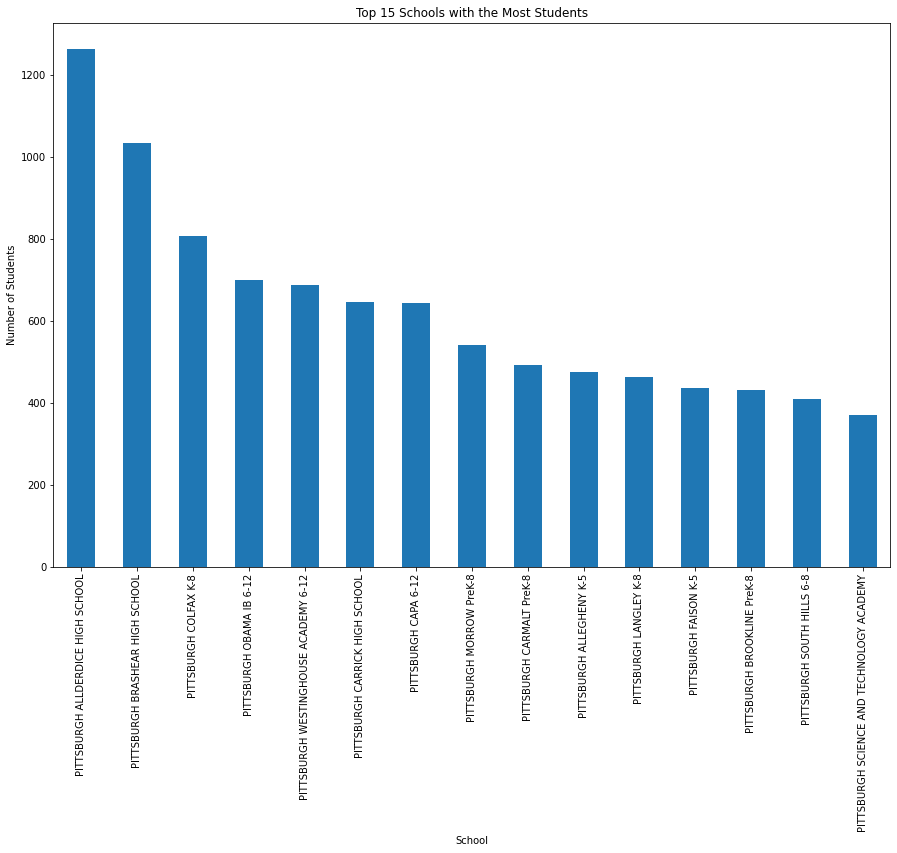

In [22]:
# group and count number of enrolled students by school
school = enrollment_filtered.groupby("school").sum().sort_values("enrolled_students", ascending=False)
school.head()

# plot top 15 schools with the most enrolled students
s_plot = school[:15].plot(kind="bar", title="Top 15 Schools with the Most Students", xlabel="School",ylabel="Number of Students",
                          legend=False, figsize = (15,10))

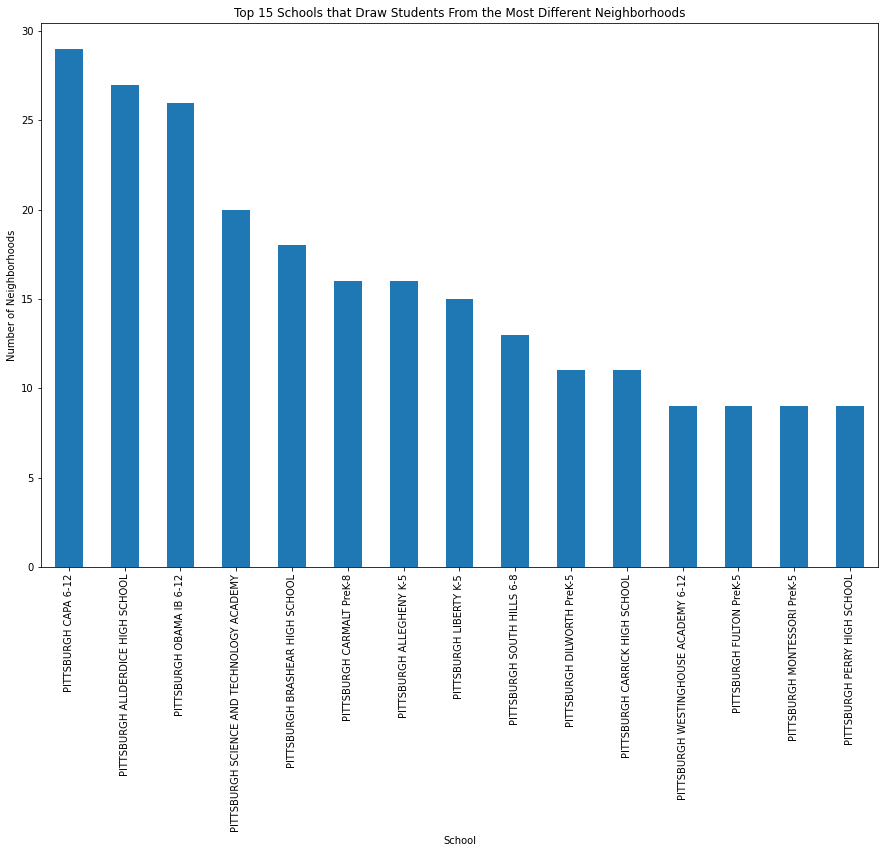

In [23]:
# group and count number of neighborhoods that feed into each school
num_of_neighborhoods = enrollment_filtered.groupby("school").count().sort_values("neighborhood", ascending=False).drop(columns=["enrolled_students"])
num_of_neighborhoods.head()

# plot top 15 schools that draw students from the most neighborhoods
n_plot = num_of_neighborhoods[:15].plot(kind="bar", title="Top 15 Schools that Draw Students From the Most Different Neighborhoods", 
                                        xlabel="School",ylabel="Number of Neighborhoods",legend=False, figsize = (15,10))

By comparing the two graphs we see above, we notice that there is an overlap of 10 different schools listed below.
I researched the neighborhoods that each school is located in and found a website that grades schools from A to D based on data including state test scores, college readiness, graduation rates, SAT/ACT scores, teacher quality, as well as reviews from students and parents. Those grades are displayed in the table below.

| School Name                                 | Neighborhood        | Grade   |
|:-------------------------------------------:|:-------------------:|:-------:|
| Pittsburgh Allderdice High School           | Squirrel Hill South |B+       |
| Pittsburgh Brashear High School             | Beechview           |C+       |
| Pittsburgh Obama IB 6-12                    | East Liberty        |C+       |
| Pittsburgh Westinghouse Academy 6-12        | Homewood West       |C+       |
| Pittsburgh Carrick High School              | Carrick             |C+       |
| Pittsburgh CAPA 6-12                        | Downtown            |C        |
| Pittsburgh Carmalt PreK-8                   | Brookline           |C+       |
| Pittsburgh Allegheny K-5                    | Central Northside   |C        |
| Pittsburgh South Hills 6-8                  | Beechview           |C+       |
| Pittsburgh Science and Technology Academy   | North Oakland       |C        |

## **The Best Neighborhood in Pittsburgh based on Safety**
For my part of the project, I wanted to look at the safety aspect of the neighborhoods. I found a data set on the Western Pennsylvania Regional Data Center that showed a list of recorded police crime incidents in various neighborhoods throughout Pittsburgh. Through the data, I was able to find the top 20 safest neighborhoods in Pittsburgh through creating a weight or value as my metric for each neighborhood based on the number and severity of the crime incidents and identifying the neighborhoods with the smallest weight which were considered to be the safest.

In [34]:
# imported pandas and matplotlib to use
import pandas as pd
import matplotlib.pyplot as plt

# accessed the data set I was using
safety = pd.read_csv("PoliceIncidents.csv") 
safety.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [35]:
# deleted all the columns except the neighborhoods and the incidents
safety = safety[['INCIDENTNEIGHBORHOOD','INCIDENTHIERARCHYDESC']]
safety.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC
0,North Shore,HARRASSMENT/THREAT/ATTEMPT/PHY
1,Upper Lawrenceville,THEFT BY DECEPTION
2,Northview Heights,DISCHARGE OF FIREARM INTO OCC.STRUCTURE
3,Golden Triangle/Civic Arena,HARRASSMENT/THREAT/ATTEMPT/PHY
4,Northview Heights,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY
5,South Side Flats,PUBLIC DRUNKENESS
6,Elliott,AGG ASSAULT/OTHER/INJURY
7,South Side Flats,PUBLIC DRUNKENESS
8,Homewood North,HARRASSMENT/THREAT/ATTEMPT/PHY
9,South Side Slopes,BURGLARY/FORCE ENT/RES


Through creating a separate DataFrame that just stores all the incidents, I was able to find out the count of the duplicates for each type of crime incident in order to figure out which crimes were the most relevant to the neighborhoods in Pittsburgh and create weights for the ten most popular crimes in addition to murder.

In [36]:
# created a DataFrame to just store all the possible incidents that have occurred and got rid of the duplicates from the original data set
incidents = safety[['INCIDENTHIERARCHYDESC']].copy()
incidents.drop_duplicates(ignore_index=True)

# displayed a new column that kept count of the number of duplicates for each incident in the data set
incidents.groupby(incidents.columns.tolist(),as_index=False).size().sort_values(by="size", ascending=False).head(10)

,INCIDENTHIERARCHYDESC,size
282,THEFT FROM AUTO,17566
289,THEFT/ALL OTHERS,15392
267,SIMPLE ASSAULT/INJURY,12759
92,CRIMINAL MISCHIEF (AUTO),11452
215,RETAIL THEFT (SHOPLIFTING),9060
138,HARRASSMENT/THREAT/ATTEMPT/PHY,8744
91,CRIMINAL MISCHIEF,8488
175,MTR VEH THEFT (AUTO),6926
137,HARRASSMENT-OTHER,5808
136,HARRASSMENT BY COMUN/ADDRESS,5107


#### Weights for the top 10 most relevant incidents + murder
The weights for the ten most relevant incidents which is found from the number of duplicates of each type of incident has occurred in Pittsburgh in addition to murder.

**THEFT FROM AUTO** = 8

**THEFT/ALL OTHERS** = 8

**SIMPLE ASSAULT/INJURY** = 15

**CRIMINAL MISCHIEF (AUTO)** = 5

**RETAIL THEFT (SHOPLIFTING)** = 5

**HARRASSMENT/THREAT/ATTEMPT/PHY** = 15

**CRIMINAL MISCHIEF** = 5

**MTR VEH THEFT (AUTO)** = 8

**HARRASSMENT-OTHER** = 10

**HARRASSMENT BY COMUN/ADDRESS** = 10

**MURDER/NON-NEG/MANSLTR-OTHER** = 20

**OTHER** = 2

Created a dictionary that kept track of the weight value for each neighborhood and if a neighborhood hasn't been created as a key, then a new key is created but otherwise the weight is added to the current value of the neighborhood's total weight.

In [37]:
# a dictionary is created to keep count of the value for the weight for each neighborhood
weight = 0
count = dict()

# loops through the entire original data set to figure out the incidents that have happened in each neighborhood
for row in range(len(safety)):
    current = safety.loc[row, "INCIDENTHIERARCHYDESC"]
    neighbrhd = safety.loc[row, "INCIDENTNEIGHBORHOOD"]
    
    # a value is given for a weight based on the severity of the crime
    if current in ["THEFT FROM AUTO", "THEFT/ALL OTHERS", "MTR VEH THEFT (AUTO)"]:
        weight = 8
    elif current in ["SIMPLE ASSAULT/INJURY", "HARRASSMENT/THREAT/ATTEMPT/PHY"]:
        weight = 15
    elif current in ["CRIMINAL MISCHIEF (AUTO)", "RETAIL THEFT (SHOPLIFTING)", "CRIMINAL MISCHIEF"]:
        weight = 5
    elif current in ["HARRASSMENT-OTHER", "HARRASSMENT BY COMUN/ADDRESS"]:
        weight = 10
    elif current=="MURDER/NON-NEG/MANSLTR-OTHER":
        weight = 20
    else:
        weight = 2
    
    # if a key exists for that neighborhood in the dictionary then the weight is added to the current value related to the key 
    # otherwise a new key is created for the neighborhood
    if neighbrhd in count:
        count[neighbrhd] = count[neighbrhd] + weight
    else:
        count[neighbrhd] = weight
    
print(count)

{'North Shore': 14618, 'Upper Lawrenceville': 6767, 'Northview Heights': 11865, 'Golden Triangle/Civic Arena': 18249, 'South Side Flats': 72682, 'Elliott': 10872, 'Homewood North': 27337, 'South Side Slopes': 17133, 'Carrick': 50811, 'South Oakland': 9207, nan: 16729, 'Bloomfield': 36243, 'Beechview': 23056, 'Bluff': 17377, 'Strip District': 13520, 'Mount Washington': 31423, 'East Carnegie': 1883, 'Crafton Heights': 12163, 'Marshall-Shadeland': 23775, 'East Liberty': 35398, 'East Allegheny': 21731, 'Friendship': 7343, 'Arlington': 9899, 'Central Northside': 3507, 'Spring Hill-City View': 10834, 'Brighton Heights': 26482, 'Westwood': 6838, 'East Hills': 21967, 'Brookline': 31759, 'South Shore': 4044, 'Lower Lawrenceville': 10299, 'Bedford Dwellings': 12461, 'Troy Hill-Herrs Island': 1007, 'Central Oakland': 19899, 'Garfield': 13907, 'West End': 3538, 'West Oakland': 7871, 'Central Lawrenceville': 17565, 'Lincoln-Lemington-Belmar': 28441, 'Sheraden': 25162, 'Beltzhoover': 8290, 'Outside 

In [38]:
# the dictionary is converted into a Series and then converted into a DataFrame with a labeled column for the weight which is shown in relation to its 
# neighborhood key
countS = pd.Series(count)
countDF = pd.DataFrame(countS, columns=["WEIGHT"])

# the weight values are sorted and shown in ascending order to show the safest neighborhoods
countDF.sort_values(by="WEIGHT", ascending=True, ignore_index=False).head(20)

,WEIGHT
Mt. Oliver Boro,413
Mt. Oliver Neighborhood,516
Outside County,615
Troy Hill-Herrs Island,1007
Outside State,1012
Ridgemont,1233
Chartiers City,1354
New Homestead,1452
East Carnegie,1883
Swisshelm Park,1990


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

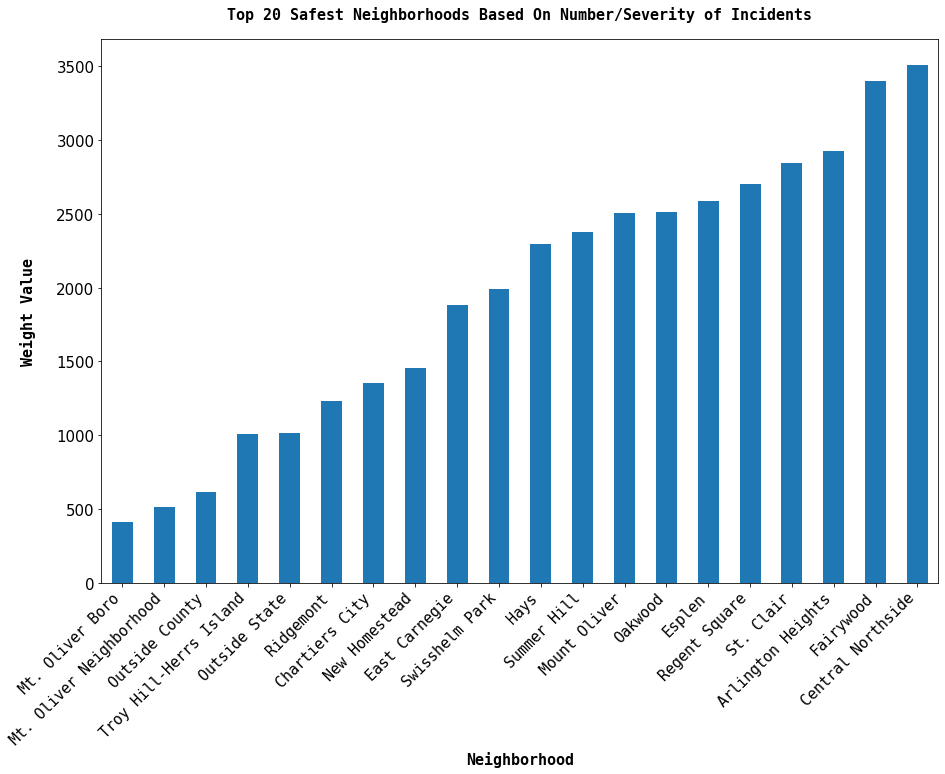

In [39]:
# a final DataFrame is created which only contains the top 20 safest neighborhoods or the 10 neighborhoods with the smallest weight value
finalNeighborhoods = countDF.sort_values(by="WEIGHT", ascending=True, ignore_index=False).head(20).copy()

# created a bar graph displaying the 20 safest neighborhoods in Pittsburgh based on the weights calculated from the data set
finalNeighborhoods.plot(kind="bar", legend=False, figsize = (15,10), fontsize=15)
plt.title('Top 20 Safest Neighborhoods Based On Number/Severity of Incidents', fontname = 'monospace', fontsize = 15, pad = 20, weight = 'bold')
plt.xlabel('Neighborhood', fontsize = 15, fontname = 'monospace', weight = 'bold')
plt.ylabel('Weight Value', fontsize = 15, labelpad = 20, fontname = 'monospace', weight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontname = 'monospace', size = 15, weight = 'normal')

## **Best Pittsburgh Neighborhood:** Central Northside
Our results for environment and education were similar, but we ended up finding that the results for safety were different from the other two aspects. This seemed to be because the data set for safety was a little older and also the population size for each neighborhood hadn't been taken into account and so that's why the larger the population size for the neighborhood, the more often it appeared in the safety data set. This lead us to increase the range for the resulting best neighborhoods based on each data set and that is how we concluded that Central Northside was the best overall based on our data sets.

### **Reflections:**
##### **Jake's Reflection:**
When referencing the graph, which pertains to the number of trees in each neighborhood, it is abundantly clear that Squirrel Hill South is the best neighborhood. This neighborhood contains almost 4000 trees, nearly double the next best neighborhood, Highland Park. With these many trees, Squirrel Hill South must be environmentally sound, as trees aid in the natural ecosystem's ability to stay healthy and function normally. It also adds natural beauty to the neighborhood, often ruined by urbanization and industrialization. On a personal note, my favorite neighborhood is Shadyside. This is because I love the shopping and eating experiences I have had there and the cute decorations on the main street. Overall, it is clear that Squirrel Hill South represents the best neighborhood when considering the environment and, more specifically, the number of trees.

##### **Laura's Reflection:**  
Based on the results of the graphs pertaining to education and comparing it to another websites data, Squirrel Hill South is the best neighborhood in Pittsburgh based on education. Although, personally my favorite neighborhood in Pittsburgh is Shadyside because of how accessible it is from campus. Also there are a ton of shops and restaurants to visit, as well as, several historic homes making Shadyside a nice nieghborhood for weekend walk with friends.

##### **Insiah's Reflection:** 
In conclusion, the best neighborhood in Pittsburgh is Mt. Oliver Boro since it had the smallest weight of 405 and is considered the safest based on my data or the recorded incidents. However, personally my favorite neighborhood is Squirrel Hill South because of how ideal the neighborhood is for a residential area. The location is pretty central where it is close by to a couple of schools in addition to being right by Waterfront which is a large shopping center. Even though the neighborhood is a little expensive, it is the perfect place to raise a family in a more suburban setting while not leaving the city.